This notebook performs exploratory data analysis (EDA). The EDA begins with an overview of the dataset, then looks at the distribution of individual features, then compares features to the target, and ends by considering various combinations of features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
#import the dataset from GitHub
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/final_df.csv'
df = pd.read_csv(url)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
#convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

#convert Store, Dept, and Type columns to category
df['Store'] = df['Store'].astype('category')

df['Dept'] = df['Dept'].astype('category')

df['Type'] = df['Type'].astype('category')

In [ ]:
#get basic info about df
df.info()

In [ ]:
#get overall summary statistics
df.describe().T

In [ ]:
#plot histograms of the continuous variables
numeric_columns = [x for x in df.columns if df.dtypes[x] in ['float', 'int']]

for var in numeric_columns:
    fig, ax = plt.subplots()
    ax.hist(df[var], bins=25)
    ax.set_title(f'Distribution of {var}')

In [ ]:
#histogram of total sales (across all stores and departments)
df.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='hist')
plt.ylabel('Number of Weeks')
plt.xticks(ticks=[40000000, 50000000, 60000000, 70000000, 80000000], labels=[40, 50, 60, 70, 80])
plt.xlabel('Total Sales in Millions')

In [ ]:
#get total sales per week across all stores
total_sales_per_week = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
total_sales_per_week

In [ ]:
total_sales_per_week.plot(x='Date', y='Weekly_Sales')
print('In an average week, the total sales across all stores are {}'.format(total_sales_per_week['Weekly_Sales'].mean()))

In [ ]:
#get average store sales per week
average_store_sales_per_week = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()
average_store_sales_per_week.head(10)

In [ ]:
average_store_sales_per_week.plot(x='Date', y='Weekly_Sales')
print('The average store does {} in sales per week'.format(average_store_sales_per_week['Weekly_Sales'].mean()))

In [ ]:
#compare the min, median, and max store
grouped_by_store = df.groupby('Store')['Weekly_Sales'].mean()

for idx, sales in grouped_by_store.iteritems():
    if sales == grouped_by_store.min():
        print(idx, sales)
    elif sales==grouped_by_store.max():
        print(idx, sales)
    elif sales==grouped_by_store.median():
        print(idx, sales)

In [ ]:
min_max_median_store = df[df['Store'].isin([5, 20, 45])].groupby(['Date', 'Store'])['Weekly_Sales'].sum().dropna().reset_index()
min_max_median_store

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=min_max_median_store)
_ = plt.xticks(rotation='90')
_ = plt.legend(['Minimum: Store 5', 'Maximum: Store 20', 'Median: Store 45'])

In [ ]:
#create a time series lag scatter plot
time_series = df_indexed.groupby(df_indexed.index)['Weekly_Sales'].mean()
print(time_series.head())

from pandas.plotting import lag_plot

fig, ax = plt.subplots(figsize=(15, 5))
_ = lag_plot(time_series, lag=1, ax=ax, c='blue')
_ = ax.set_title('Lag Plot of Weekly Sales')

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(15, 5))
autocorrelation_plot(time_series, ax=ax)
_ = plt.xlim(0, 60)
_ = plt.ylim(-.4, .4)
_ = plt.xticks(range(0, 60, 1))
_ = plt.title('Autocorrelation for Various Lag Values of Weekly Sales')
_ = plt.annotate('Lag = 1 year', xy=(52, .35))

The peak correlation occurs between the value of Weekly Sales at t, and its value at t-52 (i.e. the same week last year).
There is also some correlation between t and t-1 and negative correlation between t and t-6.

In [ ]:
#get frequency counts for the categorical variables

#get the number of rows for each store
df['Store'].value_counts().sort_values(ascending=False).rename('Number of Rows For Each Store')

In [ ]:
#get the number of rows for each department
df['Dept'].value_counts().sort_values(ascending=False).rename('Number of Rows for Each Department')

In [ ]:
#plot the number of rows for each tyoe
sns.countplot(x='Type', data=df)

In [ ]:
#get the range of the dates
print('Earliest date: {}'.format(df['Date'].min()))
print('Latest date: {}'.format(df['Date'].max()))

delta = df['Date'].max() - df['Date'].min()
print('Range: {}'.format(delta))

In [ ]:
#calculate the total sales and sales each year
print('Total sales: {}'.format(df['Weekly_Sales'].sum()))
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'sum'}))

In [ ]:
#calculate the average weekly sales each year
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'mean'}))

In [ ]:
#plot the weekly sales

sales_per_week = df.groupby(df.Date).agg({'Weekly_Sales':'sum'})

sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_week.index, sales_per_week['Weekly_Sales'] / (10**6))
_ = ax.set_title('Total Sales Per Week')
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 90.0, 5.0))

In [ ]:
df_indexed = df.set_index('Date')
df_indexed.head()

In [ ]:
sales_per_month = df_indexed.resample('M')['Weekly_Sales'].sum()

fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_month / (10**6))
_ = ax.set_title('Total Sales Per Month')
_ = ax.set_xticks(list(sales_per_month.index))
_ = ax.set_xticklabels(sales_per_month.index.strftime('%m-%d-%Y'), rotation=90)
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 400.0, 50.0))

In [ ]:
#plot weekly sales for each year
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
_ = ax[0].plot(df_indexed['2010'].groupby('Date')['Weekly_Sales'].mean())
_ = ax[1].plot(df_indexed['2011'].groupby('Date')['Weekly_Sales'].mean())
_ = ax[2].plot(df_indexed['2012'].groupby('Date')['Weekly_Sales'].mean())

_ = ax[0].set_yticks([10000, 15000, 20000, 25000])
_ = ax[1].set_yticks([10000, 15000, 20000, 25000])
_ = ax[2].set_yticks([10000, 15000, 20000, 25000])

In [ ]:
df_indexed['2010'].groupby('Date')['Weekly_Sales'].mean()

In [ ]:
#what months had the highest average weekly sales 
df_indexed.groupby(df_indexed.index.strftime('%B'))['Weekly_Sales'].mean().sort_values(ascending=False).reset_index().rename(columns={'Date':'Month', 'Weekly_Sales':'Average Weekly Sales'})

December had the highest average weekly sales. Average weekly sales are used since each month does not contain the same representation (number of weeks) in the dataset.

In [ ]:
#what weeks had the highest sales
df_indexed.groupby(df_indexed.index)['Weekly_Sales'].sum().sort_values(ascending=False).reset_index().rename(columns={'Date':'Week', 'Weekly_Sales':'Total Sales'})

Weeks that contain holidays such as Christmas and Thanksgiving (followed by black friday) are in the top 5, while the 5 lowest weeks occur in the month after Christmas. We can explore this further using the IsHoliday column:

In [ ]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

Roughly 1,000 more units are sold on holiday weeks on average than on non-holiday weeks

In [3]:
sns.pairplot(df)

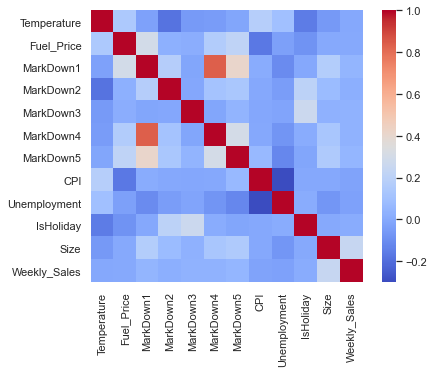

In [211]:
#plot a heatmap of correlations between each variable
fix, ax = plt.subplots(figsize=(7, 5))
_ = sns.heatmap(df.corr(), square=True, cmap='coolwarm', ax=ax)

In [212]:
#check if any variables have a linear correlation to Weekly_Sales
df.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64

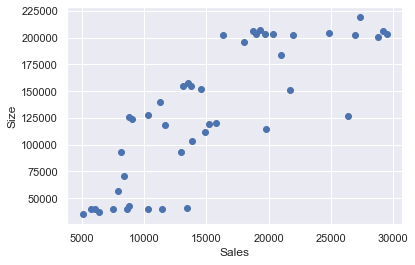

In [215]:
#do larger stores sell more units?
store_and_size = df.groupby('Store')[['Weekly_Sales', 'Size']].mean()
store_and_size = store_and_size.reset_index()
_ = plt.scatter(store_and_size['Weekly_Sales'], store_and_size['Size'])
_ = plt.xlabel('Sales')
_ = plt.ylabel('Size')

In [216]:
df['Size_Category'] = pd.cut(df['Size'], bins=[0, 100000, 200000, np.inf], labels=['Small', 'Medium', 'Large'])
df.groupby('Size_Category')['Weekly_Sales'].mean()

Size_Category
Small      8580.993002
Medium    15228.648344
Large     23231.406678
Name: Weekly_Sales, dtype: float64

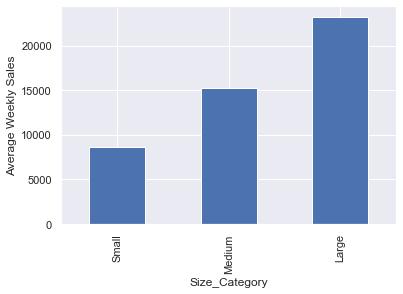

In [218]:
df.groupby('Size_Category')['Weekly_Sales'].mean().plot(kind='bar')
_ = plt.ylabel('Average Weekly Sales')

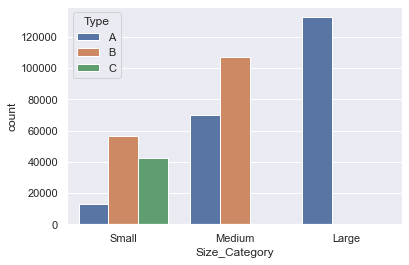

In [220]:
#is there a correlation between store size and type?
_ = sns.countplot(x='Size_Category', hue='Type', data=df)

In [245]:
#Which departments had the highest weekly sales on average
df.groupby('Dept').agg({'Weekly_Sales':'mean'}).sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
...,...
51,21.931729
39,11.123750
78,7.296638


In [221]:
#combine stores and departments into a single variable
df['Store_Dept'] = df['Store'].astype('str') + '-' + df['Dept'].astype('str')

In [254]:
#which store departments had the highest average weekly sales
df.groupby('Store_Dept').agg({'Weekly_Sales':'mean', 'Store_Dept':'count'}).sort_values(by='Weekly_Sales', ascending=False).rename(columns={'Store_Dept':'Count'})

,Weekly_Sales,Count
Store_Dept,,
14-92,182527.956014,143
2-92,164840.230979,143
20-92,164633.741538,143
13-92,162034.099301,143
4-92,159365.107902,143
...,...,...
10-47,-64.694444,36
34-47,-78.919167,12
45-47,-88.420000,12


It looks like some departments lost money and have a lower count. Let's look at Store 1, Department 47:

In [231]:
df[df['Store_Dept']=='1-47'][['Date', 'Store_Dept', 'Weekly_Sales']].sort_values(by='Date')

,Date,Store_Dept,Weekly_Sales
188,2010-02-19,1-47,-863.0
43,2010-05-02,1-47,70.0
2549,2010-08-10,1-47,-58.0
695,2010-09-04,1-47,14.0
2695,2010-10-22,1-47,60.0
406,2010-12-03,1-47,-698.0
2912,2010-12-11,1-47,20.0
3342,2010-12-24,1-47,89.0
5620,2011-05-08,1-47,198.0
4419,2011-08-04,1-47,-298.0
